In [ ]:
import numpy as np
from math import exp,log
import random
import matplotlib.pyplot as plt

In [ ]:
X=np.array([(0,0),(1,0),(0,1),(1,1)])
Y=np.array([0,1,1,1])

In [ ]:
#모델 생성
class logistic_regression_model():
    #w,b 초기화 
    def __init__(self):
        self.w=np.array([random.random(),random.random()])
        self.b=np.array(random.random())
    #시그모이드함수 생성
    def sigmoid(self,z):
        return 1/(1+exp(-z))
    #예측
    def predict(self,x):
        z=self.w[0]*x[0]+self.w[1]*x[1]+self.b
        a=self.sigmoid(z)
        return a

In [ ]:
#learning rate 모델 생성
OR_model_1=logistic_regression_model()
OR_model_2=logistic_regression_model()
OR_model_3=logistic_regression_model()

In [ ]:
def train(X,Y,model, lr=0.1):
    dw0=0.0
    dw1=0.0
    db=0.0
    m=len(X)
    cost=0.0
    for x,y in zip(X,Y):
        a=model.predict(x)
        if y==1:
            cost-=log(a)
        else:
            cost-=log(1-a)
        
        dw0+=(a-y)*x[0]
        dw1+=(a-y)*x[1]
        db+=(a-y)
    cost/=m
    model.w[0]-=lr*dw0/m
    model.w[1]-=lr*dw1/m
    model.b-=lr*db/m
    
    return cost

In [ ]:
#loss값을 각 리스트에 추가
OR_loss_1=[]
OR_loss_2=[]
OR_loss_3=[]
for epoch in range(10000):
        #learning rate 0.1
        OR_loss_1.append(train(X,Y,OR_model_1,0.1))
        #learning rate 0.2
        OR_loss_2.append(train(X,Y,OR_model_2,0.2))
        #learning rate 0.01
        OR_loss_3.append(train(X,Y,OR_model_3,0.01))

#plot생성을 위해 epoch 값도 리스트로 정리
epoch = [x for x in range(10000)]
OR_loss_1=np.array(OR_loss_1)
OR_loss_2=np.array(OR_loss_2)
OR_loss_3=np.array(OR_loss_3)

In [ ]:
#learning rate 0.1로 예측한 결과
print(OR_model_1.predict((0,0)))
print(OR_model_1.predict((0,1)))
print(OR_model_1.predict((1,0)))
print(OR_model_1.predict((1,1)))

0.020574441310714182
0.9917822087646441
0.9917833539119725
0.9999985579757993


In [ ]:
#learning rate 0.2로 예측한 결과
print(OR_model_2.predict((0,0)))
print(OR_model_2.predict((0,1)))
print(OR_model_2.predict((1,0)))
print(OR_model_2.predict((1,1)))

0.010164853860591471
0.9959369814096526
0.9959369463446487
0.9999998290867004


In [ ]:
#learning rate 0.01로 예측한 결과
print(OR_model_3.predict((0,0)))
print(OR_model_3.predict((0,1)))
print(OR_model_3.predict((1,0)))
print(OR_model_3.predict((1,1)))

0.18085085873239945
0.9305594548775534
0.9288282038449088
0.9987391854500348


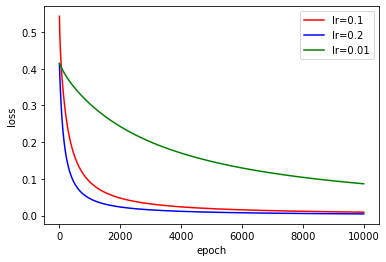

In [ ]:
#loss plot 
plt.plot(epoch,OR_loss_1,'r-',label='lr=0.1')
plt.plot(epoch,OR_loss_2,'b-',label='lr=0.2')
plt.plot(epoch,OR_loss_3,'g-',label='lr=0.01')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()